In [2]:
from random import randint
from math import ceil
import pandas as pd
import matplotlib

In [3]:
def simulate_fairness(step, total=100):
    t = a = b = 0

    while a < total and b < total:
        if randint(0, 1) == 0:
            a += step
        else:
            b += step
        t += 1

    t_2 = ceil((100 - min(a,b)) / step) + t

    # Fairness defined as time of first job completion / time of second job completion
    return t / t_2

In [4]:
NUM_EXPERIMENTS = 100
result = [(sum([simulate_fairness(s) for i in range(NUM_EXPERIMENTS)]) / NUM_EXPERIMENTS) for s in range(1, 101)]

In [5]:
df = pd.DataFrame({
    'step': list(range(1, 101)),
    'fairness': result
})

<AxesSubplot:title={'center':'Lottery scheduling fairness'}, xlabel='step size', ylabel='fairness score'>

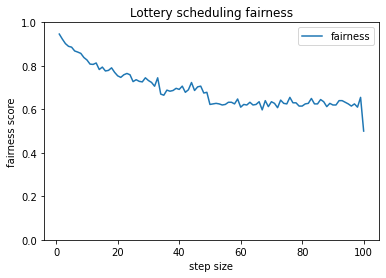

In [6]:
df.plot(x='step', y='fairness', ylim=(0, 1), xlabel='step size', ylabel='fairness score', title='Lottery scheduling fairness')